In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
%load_ext jupyter_black

In [3]:
import pickle

with open("CMI_DB_data1.pkl", "rb") as f:
    combined_df = pickle.load(f)

In [4]:
combined_df["Actual_deaths"] = (
    combined_df["AmountIncurred"] / combined_df["AmountsExposure"]
)
combined_df["Actual_deaths_lives"] = (
    combined_df["IncurredClaims"] / combined_df["LivesExposure"]
)
combined_df["Expected_deaths"] = (
    combined_df["ExpectedAmountClaims"] / combined_df["AmountsExposure"]
)
combined_df["Expected_deaths_lives"] = (
    combined_df["ExpectedClaims"] / combined_df["LivesExposure"]
)

In [5]:
combined_df = combined_df[combined_df["LivesExposure"] != 0]
combined_df.drop("ComparatorTable", axis=1, inplace=True)

In [6]:
combined_df["CommencementYear"].unique()

array(['2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '1999 or earlier', '2000', '2002', '2017', '2018', '2019', '2020'],
      dtype=object)

In [7]:
def CommencementYear_change(CommencementYear):
    if CommencementYear == "1999 or earlier":
        new_cy = 1
    else:
        new_cy = max(int(CommencementYear) - 1999 + 1, 0)
    return new_cy

In [8]:
combined_df["CommencementYear"] = combined_df["CommencementYear"].apply(
    CommencementYear_change
)

In [9]:
def Duration_change(Duration):
    if Duration == "10+":
        dur = 10
    else:
        dur = max(int(Duration), 0)
    return dur

In [10]:
combined_df["Duration"] = combined_df["Duration"].apply(Duration_change)

In [11]:
grouped_df = combined_df.groupby(
    [
        "ProductCategory",
        "Gender",
        "SmokerStatus",
        "DistributionChannel",
        "CommencementYear",
        "JointLifeStatus",
        "SumAssuredBand",
        "Age",
        "Duration",
    ]
).mean()
grouped_df = grouped_df.reset_index()

In [12]:
# combined_df=grouped_df
combined_df.drop(
    [
        "AmountsExposure",  #'IncurredClaims',
        "AmountIncurred",
        "ExpectedClaims",
        "ExpectedAmountClaims",  # 'ComparatorTable'
    ],
    axis=1,
    inplace=True,
)

In [13]:
combined_df = combined_df[combined_df["Actual_deaths_lives"] <= 1]

In [14]:
data = (
    combined_df.copy()
    .drop(
        ["Expected_deaths", "Actual_deaths", "Expected_deaths_lives", "LivesExposure"],
        axis=1,
    )
    .copy()
)

C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\325426435.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


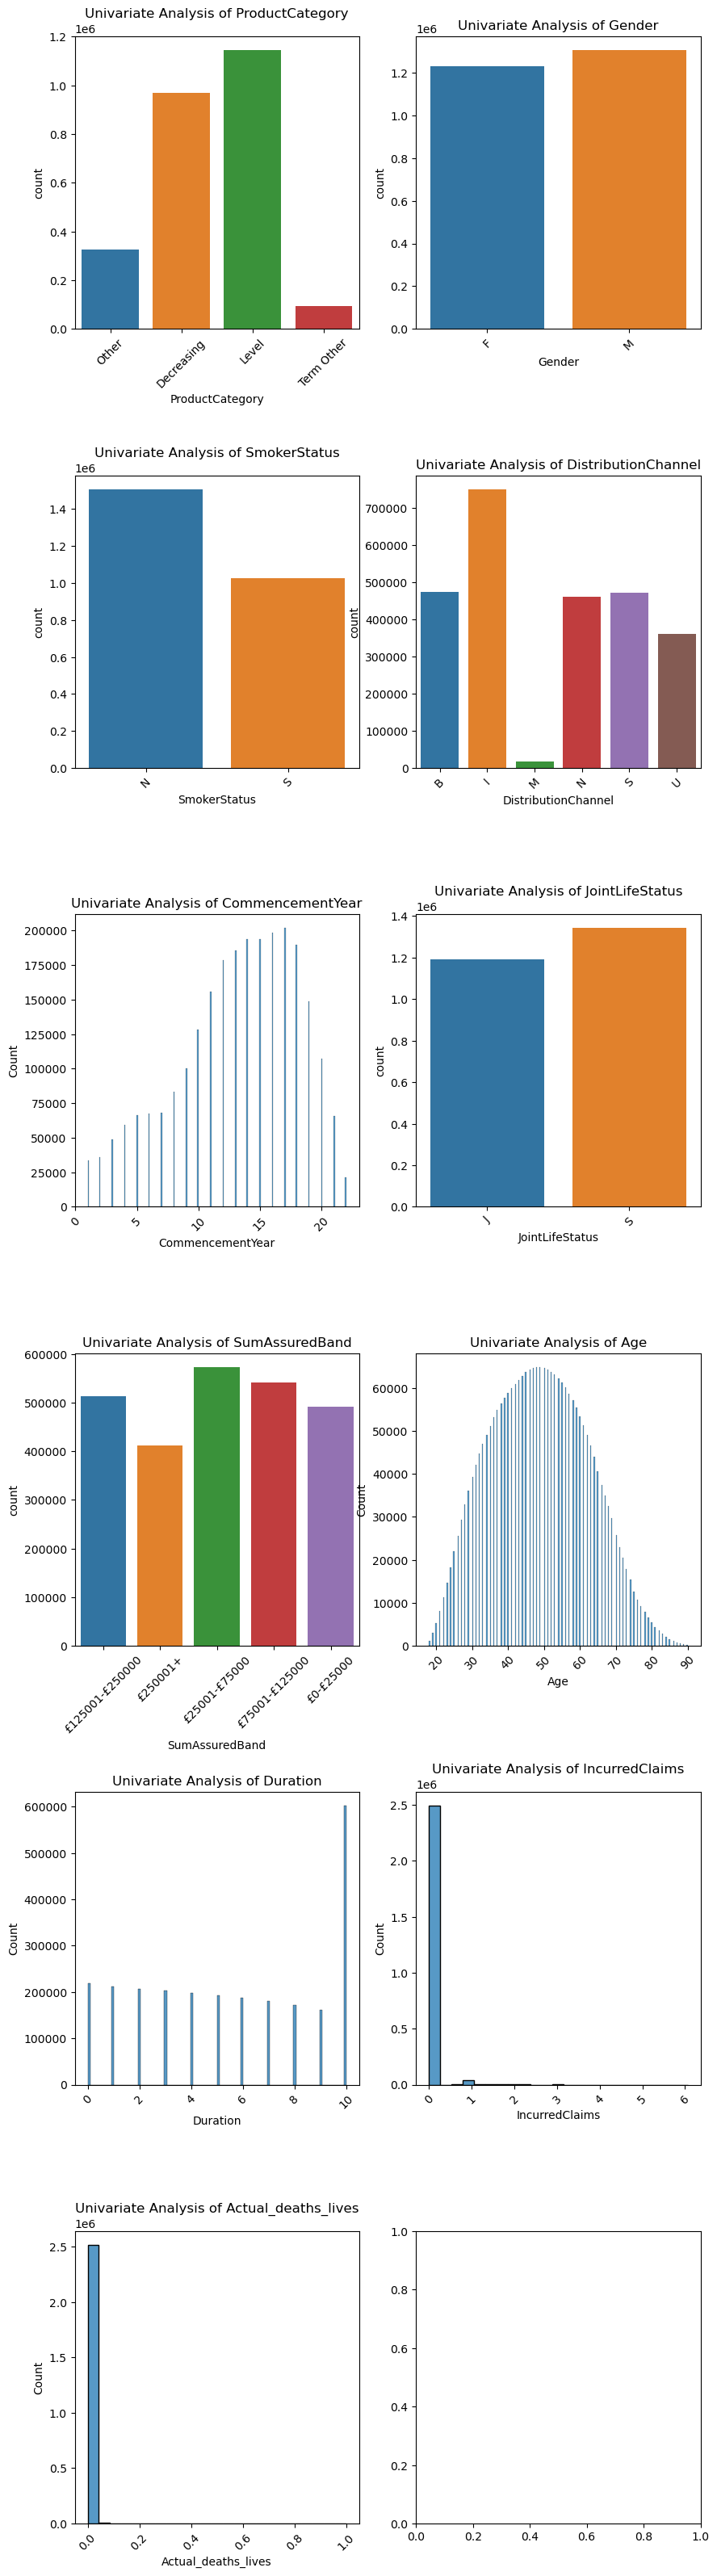

In [15]:
# Univariate plots

no_col = len(data.columns)
fig, axes = plt.subplots(nrows=(no_col // 2 + 1), ncols=2, figsize=(10, 40))
for i, column in enumerate(data.columns):
    if len(data[column].unique()) > 3 and pd.api.types.is_numeric_dtype(data[column]):
        ax = sns.histplot(data[column], ax=axes[i // 2, i % 2])
    else:
        ax = sns.countplot(x=column, data=data, ax=axes[i // 2, i % 2])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    axes[i // 2, i % 2].set_title(f"Univariate Analysis of {column}")
    plt.subplots_adjust(hspace=0.5)

plt.show()

C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\3812296924.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


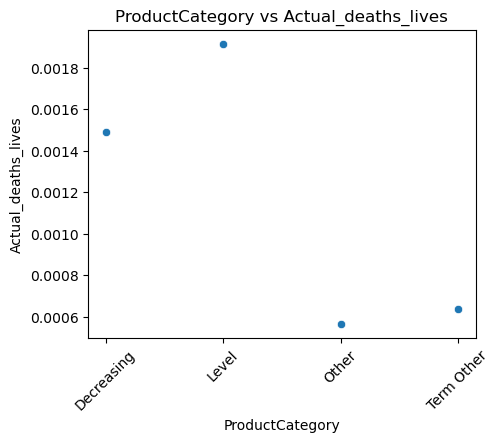

C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\3812296924.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


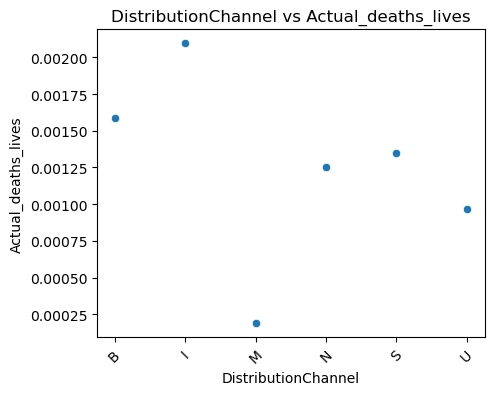

C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\3812296924.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


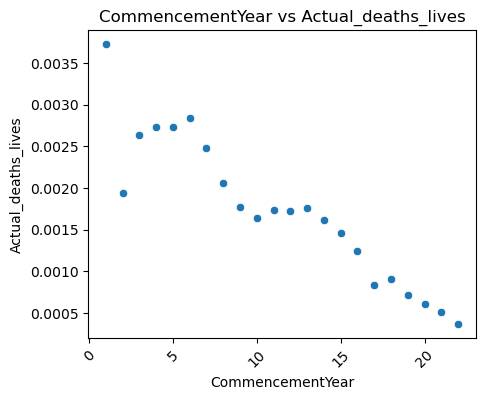

C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\3812296924.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


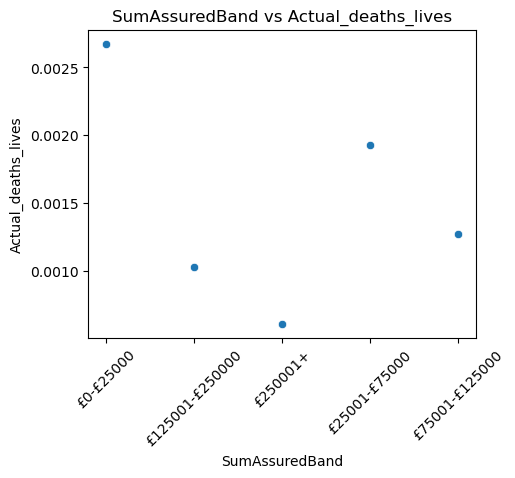

C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\3812296924.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


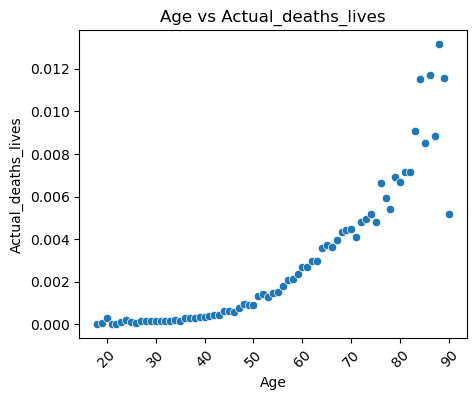

C:\Users\u013709\AppData\Local\Temp\ipykernel_14476\3812296924.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


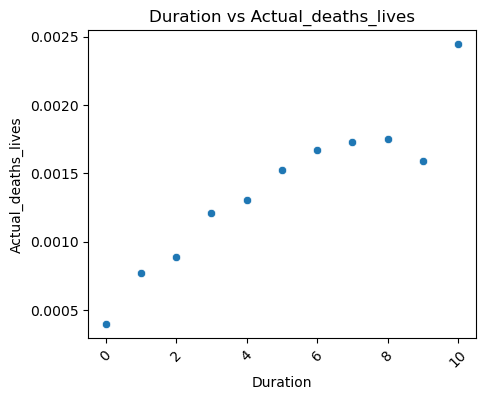

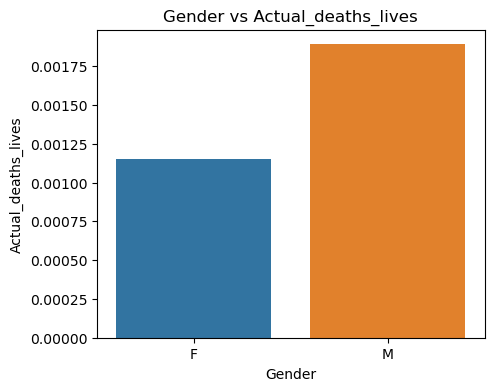

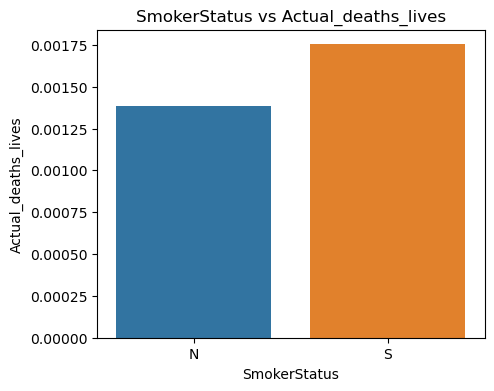

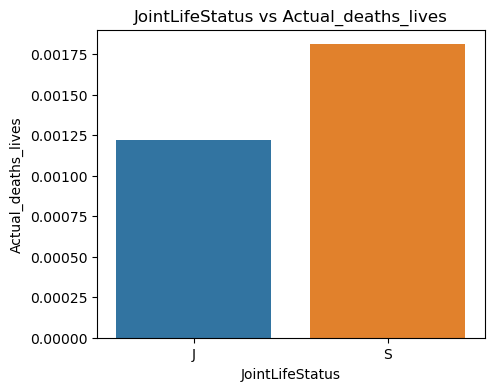

In [16]:
no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Actual_deaths_lives"  #'Actual_deaths_lives'
for i, column in enumerate(
    data.drop([Target, "IncurredClaims"], axis=1).columns
):  # ,'Expected_deaths_lives'], axis=1).columns):
    if len(data[column].unique()) > 3:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.scatterplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean(),
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs {Target}")
    plt.show()

# Box plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.barplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean().reset_index(),
    )

    plt.title(f"{var} vs {Target}")
    plt.show()

plt.show()

In [17]:
combined_df_encoded = pd.get_dummies(combined_df, drop_first=True)

In [18]:
combined_df_encoded = combined_df_encoded.apply(
    lambda x: x.astype(int) if x.dtypes == "bool" else x
)
combined_df_encoded.drop(
    ["Actual_deaths", "Expected_deaths", "Expected_deaths_lives"], axis=1, inplace=True
)

In [19]:
combined_df_encoded.dtypes

CommencementYear                    int64
Age                                 int64
Duration                            int64
LivesExposure                     float64
IncurredClaims                    float64
Actual_deaths_lives               float64
ProductCategory_Level               int32
ProductCategory_Other               int32
ProductCategory_Term Other          int32
Gender_M                            int32
SmokerStatus_S                      int32
DistributionChannel_I               int32
DistributionChannel_M               int32
DistributionChannel_N               int32
DistributionChannel_S               int32
DistributionChannel_U               int32
JointLifeStatus_S                   int32
SumAssuredBand_£125001-£250000      int32
SumAssuredBand_£250001+             int32
SumAssuredBand_£25001-£75000        int32
SumAssuredBand_£75001-£125000       int32
dtype: object

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

df = combined_df_encoded.drop("Actual_deaths_lives", axis=1).copy()
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values

# Split data
X = df.drop(
    ["IncurredClaims", "LivesExposure"], axis=1
)  # Remove LivesExposure from features
y = df["IncurredClaims"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the Poisson regression model with LivesExposure as an offset
poisson_model = sm.GLM(
    y_train,
    X_train,
    family=sm.families.Poisson(),
    offset=np.log(df.loc[X_train.index, "LivesExposure"]),
).fit()

# Print the summary of the model
print(poisson_model.summary())

# Predict on the test set
y_pred = poisson_model.predict(
    X_test, offset=np.log(df.loc[X_test.index, "LivesExposure"])
)


# Show the predicted values along with the target values
predicted_vs_actual = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

                 Generalized Linear Model Regression Results                  
Dep. Variable:         IncurredClaims   No. Observations:              2025724
Model:                            GLM   Df Residuals:                  2025705
Model Family:                 Poisson   Df Model:                           18
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3235e+05
Date:                Sun, 22 Sep 2024   Deviance:                   1.9618e+05
Time:                        20:02:42   Pearson chi2:                 1.65e+06
No. Iterations:                     8   Pseudo R-squ. (CS):            0.02122
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [ ]:
residuals = poisson_model.resid_deviance

# Plot residuals vs. fitted values
plt.figure(figsize=(4, 3))
sns.scatterplot(x=poisson_model.fittedvalues, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# Plot residuals vs. each predictor
for column in X.columns:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=X[column], y=residuals)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel(column)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs. {column}")
    plt.show()

<Axes: >

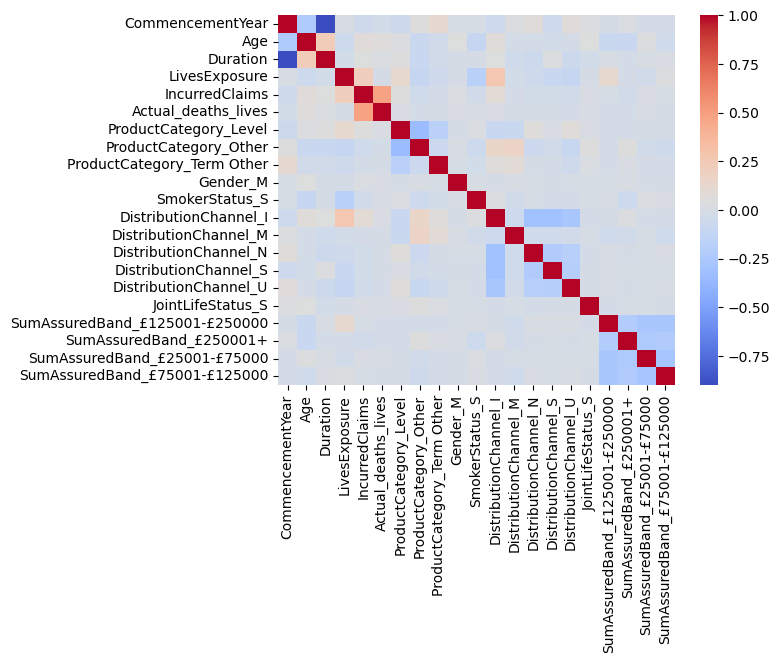

In [22]:
sns.heatmap(combined_df_encoded.corr(), cmap="coolwarm", annot=False)

#####  There is collinearity between distribution channels , commencement year and probaly product category

In [24]:
combined_df_encoded.columns

Index(['CommencementYear', 'Age', 'Duration', 'LivesExposure',
       'IncurredClaims', 'Actual_deaths_lives', 'ProductCategory_Level',
       'ProductCategory_Other', 'ProductCategory_Term Other', 'Gender_M',
       'SmokerStatus_S', 'DistributionChannel_I', 'DistributionChannel_M',
       'DistributionChannel_N', 'DistributionChannel_S',
       'DistributionChannel_U', 'JointLifeStatus_S',
       'SumAssuredBand_£125001-£250000', 'SumAssuredBand_£250001+',
       'SumAssuredBand_£25001-£75000', 'SumAssuredBand_£75001-£125000'],
      dtype='object')

### Poisson distribution modelling

Input Layer
    |
    v
+---------------------+
| Original Features   |
+---------------------+
    |
    v
+---------------------+
| Interaction Terms   |
| (agr, duration*,    |
|  commencement_year*)|
+---------------------+
    |
    v
+---------------------+
| Concatenation Layer |
+---------------------+
    |
    v
+---------------------+
| Fully Connected     |
| Layer               |
+---------------------+
    |
    v
+---------------------+
| Exp transform       |
+---------------------+
    |
    v
Output Layer


In [25]:
import pickle

with open("study.pkl", "rb") as f:
    study = pickle.load(f)

In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

df = combined_df_encoded.copy()

try:
    age_cut = study.best_params["age_cut"]  # 50
    age_power = study.best_params["age_power"]  # 4.133448889716881  #
    weight_decay = study.best_params["weight_decay"]  # 1.0441166112064366e-05
    num_epochs = study.best_params["num_epochs"]  # 680
    lambda_l1 = study.best_params["lambda_l1"]
    lr = study.best_params["lr"]
    age_multiplier = study.best_params["age_multiplier"]
    print(f"read best params{study.best_params}")
except:
    age_cut = 35  # study.best_params["age_cut"]  # 50
    age_power = 1.3  # study.best_params["age_power"]  # 4.133448889716881  #
    weight_decay = 0.0002  # study.best_params["weight_decay"]  # 1.0441166112064366e-05
    num_epochs = 650  # study.best_params["num_epochs"]  # 680
    lambda_l1 = 0.00005  # study.best_params["lambda_l1"]
    lr = 0.1  # study.best_params["lr"]
    print("read other params")


df["Age2"] = (
    age_multiplier * np.maximum(df["Age"] - age_cut, 0) ** age_power
)  # np.exp(df['Age'])
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
df["IncurredClaims"] = df["IncurredClaims"]
# Split data
X = df.drop(
    ["IncurredClaims", "LivesExposure", "Actual_deaths_lives"], axis=1
)  # Exclude LivesExposure from input features
y = df["IncurredClaims"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    df.loc[X_train.index, "LivesExposure"].values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    df.loc[X_test.index, "LivesExposure"].values.reshape(-1, 1), dtype=torch.float32
)


# NN with custom interaction layer and offset
class Mort_Net(nn.Module):
    def __init__(self):
        super(Mort_Net, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CommencementYear")
        ]
        # Define the fully connected layer
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

    def forward(self, x, exposure):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []  # torch.tensor(data=[], dtype=torch.float32)
        for idx in (
            self.duration_indices + self.commencement_year_indices  # + [self.age_idx]
        ):
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
            # print(interaction_term)

            # interaction_terms= torch.tensor(data=[], dtype=torch.float32)
            interaction_terms1 = torch.cat(interaction_terms, dim=1)
        # Concatenate the original features with interaction terms

        x_combined = torch.cat((x, interaction_terms1), dim=1)

        # Final fully connected layer
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the poisson
        output = torch.exp(offset_output)

        return output


model = Mort_Net()
criterion = nn.PoissonNLLLoss(log_input=False)  # nn.MSELoss()#
optimizer = optim.Adam(
    model.parameters(), lr=lr, weight_decay=weight_decay
)  # Lower learning rate; weight decay acts to mimimise large weights like L2 regularisation


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor, lives_exposure_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # + l1_loss(model, lambda_l1=0.00008)
    if torch.isnan(loss):
        print(f"Epoch {epoch+1}, Loss: NaN detected")
        break
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)
    total_loss = loss + l1_reg
    total_loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor, lives_exposure_test_tensor)
    loss = criterion(outputs, y_test_tensor)
    print(f"Test Loss: {loss.item()}")

read best params{'lr': 0.1480942593230851, 'weight_decay': 0.00019861532561891423, 'num_epochs': 902, 'lambda_l1': 6.17969432529951e-05, 'age_cut': 22, 'age_power': 4.789957544934851, 'age_multiplier': 0.40023787687401413}
Epoch 20, Loss: 0.9940441250801086
Epoch 40, Loss: 0.32540321350097656
Epoch 60, Loss: 0.22625289857387543
Epoch 80, Loss: 0.18299859762191772
Epoch 100, Loss: 0.15676282346248627
Epoch 120, Loss: 0.1385013312101364
Epoch 140, Loss: 0.1250559538602829
Epoch 160, Loss: 0.11485723406076431
Epoch 180, Loss: 0.10695008188486099
Epoch 200, Loss: 0.10070494562387466
Epoch 220, Loss: 0.09569146484136581
Epoch 240, Loss: 0.09160773456096649
Epoch 260, Loss: 0.08823889493942261
Epoch 280, Loss: 0.08542920649051666
Epoch 300, Loss: 0.08306032419204712
Epoch 320, Loss: 0.08104447275400162
Epoch 340, Loss: 0.07931461930274963
Epoch 360, Loss: 0.07781906425952911
Epoch 380, Loss: 0.07651747763156891
Epoch 400, Loss: 0.07537779211997986
Epoch 420, Loss: 0.0743744969367981
Epoch 44

In [ ]:
import optuna
from sklearn.metrics import r2_score

age_cut = 40
age_power = 2


def objective(trial):
    global y_test_tensor
    global age_cut
    global age_power
    lr = trial.suggest_float("lr", 1e-3, 2e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    num_epochs = trial.suggest_int("num_epochs", 300, 1000)
    lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
    age_cut = trial.suggest_int("age_cut", 20, 90)
    age_power = trial.suggest_float("age_power", 1.3, 5)
    age_multiplier = trial.suggest_float("age_multiplier", 0, 1)
    df = combined_df_encoded.copy()
    df["Age2"] = age_multiplier * (
        np.maximum(df["Age"] - age_cut, 0) ** age_power
    )  # np.exp(df['Age'])
    df["LivesExposure"] = df["LivesExposure"].clip(
        lower=1e-6
    )  # Ensure no zero or negative values;w we did filter out few cases earlier
    df["IncurredClaims"] = df["IncurredClaims"]
    # Split data
    X = df.drop(
        ["IncurredClaims", "LivesExposure", "Actual_deaths_lives"], axis=1
    )  # Exclude LivesExposure from input features
    y = df["IncurredClaims"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train), columns=X_train.columns
    )
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

    # Convert data to tensors
    X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

    model = Mort_Net()
    criterion = nn.PoissonNLLLoss(log_input=False)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor, lives_exposure_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        l1_reg = l1_loss(model, lambda_l1=lambda_l1)
        total_loss = loss + l1_reg
        total_loss.backward()

        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor, lives_exposure_test_tensor)
        # r2 = r2_score(y_test_tensor.numpy(), outputs.numpy())
        y_test_tensor = y_test_tensor + 1e-8
        mean_target = torch.mean(y_test_tensor)
        null_deviance = 2 * torch.sum(
            y_test_tensor * torch.log(y_test_tensor / mean_target)
            - (y_test_tensor - mean_target)
        )
        model_deviance = 2 * torch.sum(
            y_test_tensor * torch.log(y_test_tensor / outputs)
            - (y_test_tensor - outputs)
        )
        Pseudo_R2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo_R2: {Pseudo_R2.item():.4f}")
    print(
        f"LR: {lr} weight_decay: {weight_decay} num_epochs: {num_epochs}  mean {np.mean(outputs.numpy().flatten())} \
                std {np.std(outputs.numpy().flatten())}  Pseudo_R2 : {Pseudo_R2}"
    )
    return Pseudo_R2


# optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=60)
print("Best hyperparameters: ", study.best_params)

In [92]:
y_test_tensor = y_test_tensor + 1e-8
mean_target = torch.mean(y_test_tensor)
null_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / mean_target)
    - (y_test_tensor - mean_target)
)
model_deviance = 2 * torch.sum(
    y_test_tensor * torch.log(y_test_tensor / outputs) - (y_test_tensor - outputs)
)
poisson_deviance = null_deviance - model_deviance
print(
    f"poisson deviance: {poisson_deviance}  psuedo R2 ={ 1- model_deviance/null_deviance}"
)
y_pred = outputs.numpy().flatten()

poisson deviance: 24315.13671875  psuedo R2 =0.323173463344574


In [93]:
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)
y_test_df = pd.DataFrame(y_test, columns=["IncurredClaims"])  # Expected_deaths_lives


test_df = pd.concat([X_test_df, y_test_df], axis=1)
test_df["Predicted_Claims"] = y_pred
filtered_combined_df = combined_df.loc[test_df.index]

# Add the predicted values to the filtered combined DataFrame
filtered_combined_df["Predicted_Claims"] = test_df["Predicted_Claims"].values  # /100
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)

In [94]:
X_test["Expected_deaths_lives"] = filtered_combined_df[
    filtered_combined_df.index.isin(X_test.index)
]["Expected_deaths_lives"]
X_test["Actual_deaths_lives"] = filtered_combined_df[
    filtered_combined_df.index.isin(X_test.index)
]["Actual_deaths_lives"]

In [95]:
actual_mean = np.sum(
    lives_exposure_test_tensor.numpy() * (y_test.values.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
predicted_mean = np.sum(
    lives_exposure_test_tensor.numpy() * (y_pred.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
expected_deaths_mean = np.sum(
    lives_exposure_test_tensor.numpy()
    * (X_test["Expected_deaths_lives"].values.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
actual_deaths_mean = np.sum(
    lives_exposure_test_tensor.numpy()
    * (X_test["Actual_deaths_lives"].values.reshape(-1, 1))
) / np.sum(lives_exposure_test_tensor.numpy())
print(f"Actual Mean: {actual_mean}")
print(f"Predicted Mean: {predicted_mean}")
print(f"expected_deaths_mean: {expected_deaths_mean}")
print(f"actual_deaths_mean: {actual_deaths_mean}")

Actual Mean: 0.10193600096680397
Predicted Mean: 0.11638742685317993
expected_deaths_mean: 0.0013106690841431636
actual_deaths_mean: 0.0012521916269368479


In [96]:
filtered_combined_df["Predicted_Claims_rate"] = (
    filtered_combined_df["Predicted_Claims"] / filtered_combined_df["LivesExposure"]
)

##### plot of high level trends for predicted  followed by partial dependence plots( to be developed)

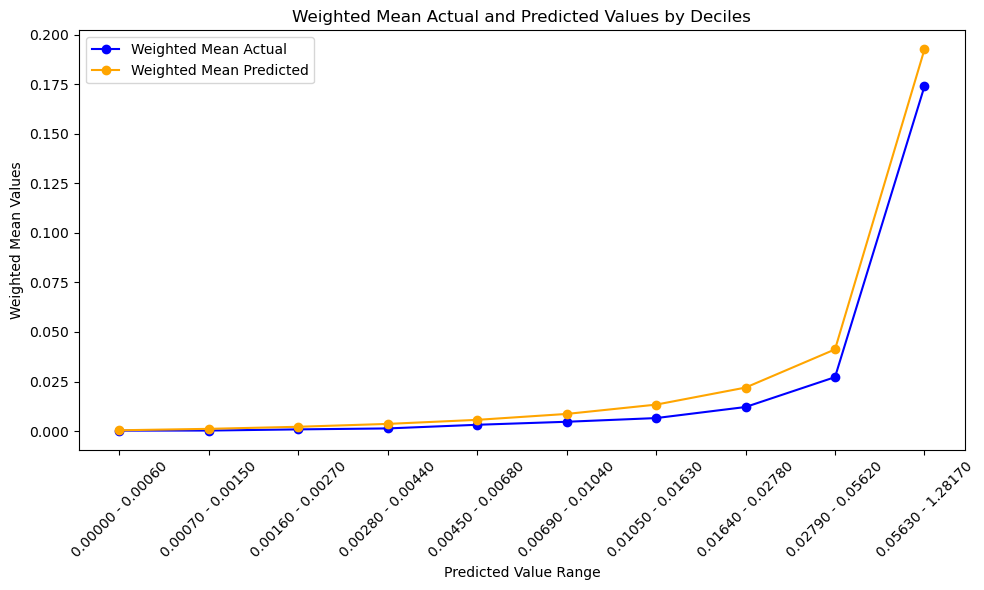

In [97]:
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 4)
weights2 = lives_exposure_test_tensor.numpy().flatten()

df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights2})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = test_df["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 10, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(10), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()

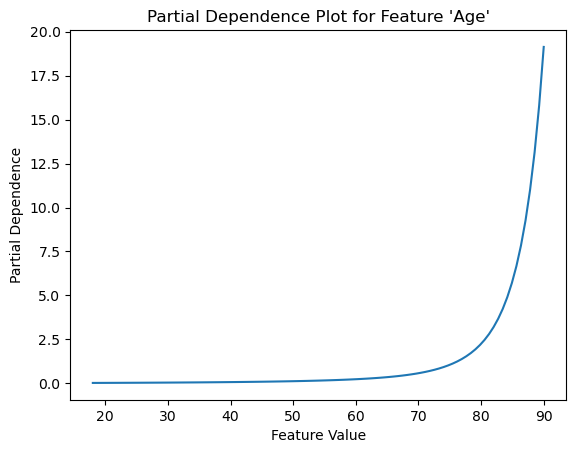

In [102]:
feature_index = X_train.columns.get_loc("Age")
feature_index2 = X_train.columns.get_loc("Age2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)

partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = (
        age_multiplier * np.maximum(val - age_cut, 0) ** age_power
    )
    X_temp_scaled = scaler.transform(X_temp)

    model.eval()
    with torch.no_grad():
        preds = model(
            torch.tensor(X_temp_scaled, dtype=torch.float32),
            lives_exposure_train_tensor,
        )
        # pred_rate = preds / lives_exposure_train_tensor
        weighted_avg = torch.sum(preds * lives_exposure_train_tensor) / torch.sum(
            lives_exposure_train_tensor
        )
        partial_dependence.append(weighted_avg.item())

# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot for Feature 'Age'")
plt.show()

Other high level trends

In [ ]:
data = filtered_combined_df.drop(
    ["Actual_deaths", "Expected_deaths", "LivesExposure", "Predicted_Claims_rate"],
    axis=1,
).copy()


no_col = len(data.columns)
continuous_vars = []
categorical_vars = []
Target = "Predicted_Claims_rate"
for i, column in enumerate(data.drop([Target], axis=1).columns):
    if len(data[column].unique()) > 25:
        continuous_vars.append(column)
    else:
        categorical_vars.append(column)


for var in continuous_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.scatterplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean().reset_index(),
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs {Target}")
    plt.show()

# Box plots for categorical variables vs target
for var in categorical_vars:
    plt.figure(figsize=(5, 4))
    ax = sns.barplot(
        x=var,
        y=f"{Target}",
        data=data[[f"{var}", f"{Target}"]].groupby([f"{var}"]).mean().reset_index(),
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(f"{var} vs {Target}")
    plt.show()

plt.show()

#### Model 2 : Zero inflation Poisson

In [35]:
with open("study_zip2.pkl", "rb") as f:
    study_zip2 = pickle.load(f)

In [36]:
df = combined_df_encoded.copy()
other_best_params = {
    "lr": 0.014308733709583011,
    "weight_decay": 0.0003051970362354501,
    "num_epochs": 622,
    "lambda_l1": 4.044526403551327e-05,
    "age_cut": 45,
    "age_power": 2.392131994686848,
}


try:
    age_cut = study_zip2.best_params["age_cut"]  # 50
    age_power = study_zip2.best_params["age_power"]  # 4.133448889716881  #
    weight_decay = study_zip2.best_params["weight_decay"]  # 1.0441166112064366e-05
    num_epochs = study_zip2.best_params["num_epochs"]  # 680
    lambda_l1 = study_zip2.best_params["lambda_l1"]
    lr = study_zip2.best_params["lr"]
    print(f"using bbest params {study_zip2.best_params}")
except:
    age_cut = other_best_params["age_cut"]  # 50
    age_power = other_best_params["age_power"]  # 4.133448889716881  #
    weight_decay = other_best_params["weight_decay"]  # 1.0441166112064366e-05
    num_epochs = other_best_params["num_epochs"]  # 680
    lambda_l1 = other_best_params["lambda_l1"]
    lr = other_best_params["lr"]
    print("using other params")


df["Age2"] = np.maximum(df["Age"] - age_cut, 0) ** age_power  # np.exp(df['Age'])
df["LivesExposure"] = df["LivesExposure"].clip(
    lower=1e-6
)  # Ensure no zero or negative values;w we did filter out few cases earlier
df["IncurredClaims"] = df["IncurredClaims"]
# Split data
X = df.drop(
    ["IncurredClaims", "LivesExposure", "Actual_deaths_lives"], axis=1
)  # Exclude LivesExposure from input features
y = df["IncurredClaims"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Convert LivesExposure to tensors
lives_exposure_train_tensor = torch.tensor(
    df.loc[X_train.index, "LivesExposure"].values.reshape(-1, 1), dtype=torch.float32
)
lives_exposure_test_tensor = torch.tensor(
    df.loc[X_test.index, "LivesExposure"].values.reshape(-1, 1), dtype=torch.float32
)


class Mort_Net_ZIP(nn.Module):
    def __init__(self):
        super(Mort_Net_ZIP, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CommencementYear")
        ]

        # Define the fully connected layers
        interaction_input_size = len(self.duration_indices) + len(
            self.commencement_year_indices
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # Additional layer for zero inflation
        self.fc_zero_inflation = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )

    def forward(self, x, exposure):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []
        for idx in self.duration_indices + self.commencement_year_indices:
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
        interaction_terms1 = torch.cat(interaction_terms, dim=1)

        # Concatenate the original features with interaction terms
        x_combined = torch.cat((x, interaction_terms1), dim=1)

        # Final fully connected layer for Poisson part
        linear_output = self.fc2(x_combined)

        # Adding the log of the exposure as an offset
        offset_output = linear_output + torch.log(exposure)

        # Apply exponential activation for the Poisson part
        poisson_output = torch.exp(offset_output)

        # Zero inflation part
        zero_inflation_output = torch.sigmoid(self.fc_zero_inflation(x_combined))

        return poisson_output, zero_inflation_output


model = Mort_Net_ZIP()
criterion_poisson = nn.PoissonNLLLoss(log_input=False)
criterion_bernoulli = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


for epoch in range(num_epochs):
    optimizer.zero_grad()
    poisson_outputs, zero_inflation_outputs = model(
        X_train_tensor, lives_exposure_train_tensor
    )

    # Calculate losses
    poisson_loss = criterion_poisson(poisson_outputs, y_train_tensor)
    bernoulli_loss = criterion_bernoulli(
        zero_inflation_outputs, (y_train_tensor == 0).float()
    )
    l1_reg = l1_loss(model, lambda_l1=lambda_l1)

    total_loss = poisson_loss + bernoulli_loss + l1_reg
    total_loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(
            f"Epoch {epoch+1}, Poisson Loss: {poisson_loss.item()}, Bernoulli Loss: {bernoulli_loss.item()}, Total Loss: {total_loss.item()}"
        )

model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    poisson_loss = criterion_poisson(poisson_outputs, y_test_tensor)
    bernoulli_loss = criterion_bernoulli(
        zero_inflation_outputs, (y_test_tensor == 0).float()
    )
    total_loss = poisson_loss + bernoulli_loss
    print(
        f"Test Poisson Loss: {poisson_loss.item()}, Test Bernoulli Loss: {bernoulli_loss.item()}, Test Total Loss: {total_loss.item()}"
    )

using bbest params {'lr': 0.02210864541675359, 'weight_decay': 9.177153307638537e-06, 'num_epochs': 390, 'lambda_l1': 0.00031336405452526083, 'age_cut': 29, 'age_power': 3.259918340103458}
Epoch 20, Poisson Loss: 4.2699995040893555, Bernoulli Loss: 0.4723163843154907, Total Loss: 4.744509220123291
Epoch 40, Poisson Loss: 2.960939645767212, Bernoulli Loss: 0.34895768761634827, Total Loss: 3.312548875808716
Epoch 60, Poisson Loss: 2.283034086227417, Bernoulli Loss: 0.267993301153183, Total Loss: 2.5537731647491455
Epoch 80, Poisson Loss: 1.8398542404174805, Bernoulli Loss: 0.2151179164648056, Total Loss: 2.0578365325927734
Epoch 100, Poisson Loss: 1.5243175029754639, Bernoulli Loss: 0.17984026670455933, Total Loss: 1.7071642875671387
Epoch 120, Poisson Loss: 1.2875497341156006, Bernoulli Loss: 0.1555424928665161, Total Loss: 1.4462295770645142
Epoch 140, Poisson Loss: 1.1048123836517334, Bernoulli Loss: 0.13824540376663208, Total Loss: 1.2463215589523315
Epoch 160, Poisson Loss: 0.960750

In [ ]:
import optuna
from sklearn.metrics import r2_score

age_cut = 40
age_power = 2


def objective(trial):
    global y_test_tensor
    global age_cut
    global age_power
    lr = trial.suggest_float("lr", 1e-3, 2e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    num_epochs = trial.suggest_int("num_epochs", 10, 800)
    lambda_l1 = trial.suggest_float("lambda_l1", 1e-5, 1e-1, log=True)
    age_cut = trial.suggest_int("age_cut", 20, 90)
    age_power = trial.suggest_float("age_power", 1.3, 5)
    df = combined_df_encoded.copy()
    df["Age2"] = np.maximum(df["Age"] - age_cut, 0) ** age_power
    df["LivesExposure"] = df["LivesExposure"].clip(lower=1e-6)
    df["IncurredClaims"] = df["IncurredClaims"]

    # Split data
    X = df.drop(["IncurredClaims", "LivesExposure", "Actual_deaths_lives"], axis=1)
    y = df["IncurredClaims"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train), columns=X_train.columns
    )
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

    # Convert data to tensors
    X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
    lives_exposure_train_tensor = torch.tensor(
        df.loc[X_train.index, "LivesExposure"].values.reshape(-1, 1),
        dtype=torch.float32,
    )
    lives_exposure_test_tensor = torch.tensor(
        df.loc[X_test.index, "LivesExposure"].values.reshape(-1, 1), dtype=torch.float32
    )

    model = Mort_Net_ZIP()
    criterion_poisson = nn.PoissonNLLLoss(log_input=False)
    criterion_bernoulli = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        poisson_outputs, zero_inflation_outputs = model(
            X_train_tensor, lives_exposure_train_tensor
        )
        poisson_loss = criterion_poisson(poisson_outputs, y_train_tensor)
        bernoulli_loss = criterion_bernoulli(
            zero_inflation_outputs, (y_train_tensor == 0).float()
        )
        l1_reg = l1_loss(model, lambda_l1=lambda_l1)
        total_loss = poisson_loss + bernoulli_loss + l1_reg
        total_loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        poisson_outputs, zero_inflation_outputs = model(
            X_test_tensor, lives_exposure_test_tensor
        )
        y_pred = poisson_outputs * (1 - zero_inflation_outputs)
        y_test_tensor = y_test_tensor + 1e-8
        mean_target = torch.mean(y_test_tensor)
        null_deviance = 2 * torch.sum(
            y_test_tensor * torch.log(y_test_tensor / mean_target)
            - (y_test_tensor - mean_target)
        )
        model_deviance = 2 * torch.sum(
            y_test_tensor * torch.log(y_test_tensor / y_pred) - (y_test_tensor - y_pred)
        )
        Pseudo_R2 = 1 - (model_deviance / null_deviance)

    print(f"Pseudo_R2: {Pseudo_R2.item():.4f}")
    print(
        f"LR: {lr} weight_decay: {weight_decay} num_epochs: {num_epochs} mean {np.mean(y_pred.numpy().flatten())} std {np.std(y_pred.numpy().flatten())} Pseudo_R2 : {Pseudo_R2}"
    )
    return Pseudo_R2


# Optimize the objective function
study_zip2 = optuna.create_study(direction="maximize")
study_zip2.optimize(objective, n_trials=60)


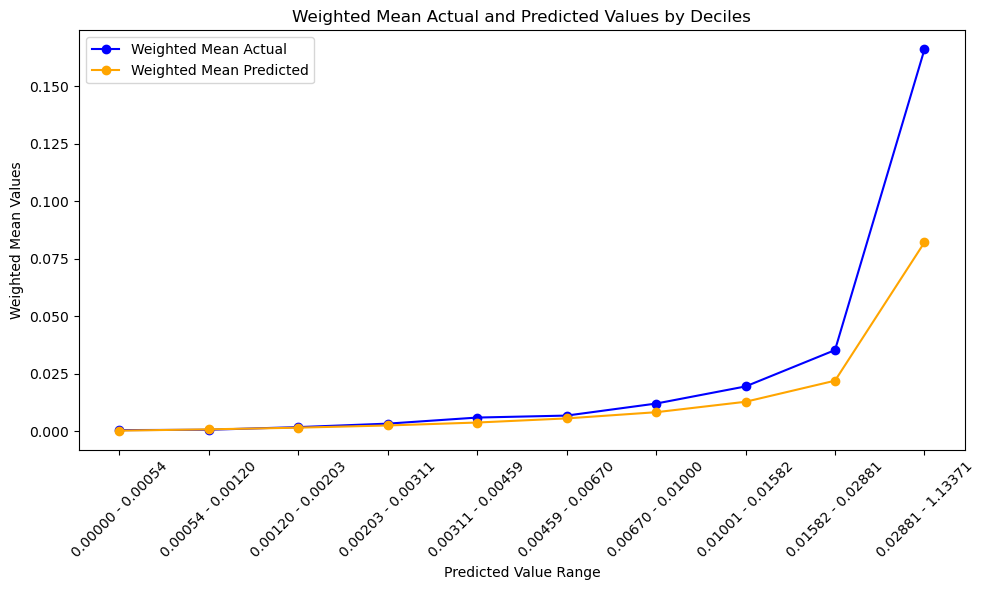

In [37]:
model.eval()
with torch.no_grad():
    poisson_outputs, zero_inflation_outputs = model(
        X_test_tensor, lives_exposure_test_tensor
    )
    y_pred_poisson = poisson_outputs.numpy().flatten()
    y_pred_bernoulli = zero_inflation_outputs.numpy().flatten()

# Combine the Poisson and Bernoulli outputs to get the final predictions
y_pred = y_pred_poisson * (1 - y_pred_bernoulli)

# Flatten the actual values and weights
actual = y_test_tensor.numpy().flatten()
predicted = np.round(y_pred, 6)
weights = lives_exposure_test_tensor.numpy().flatten()

# Create a DataFrame for lift analysis
df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = X_test_scaled["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 10, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


# Calculate weighted means for each decile
decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(10), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Model 3 > With weights, modelling claims_rate : no 'LivesExposure' offset ( using no offset and LivesExposure as weight) and PoissonNLLLoss

In [48]:
with open("study_weights3.pkl", "rb") as f:
    study_weights3 = pickle.load(f)
study_weights3.best_params

{'lr': 0.1973669220212918,
 'weight_decay': 0.0005071556921575834,
 'num_epochs': 877,
 'lambda_l1': 8.139713993500142e-05,
 'age_cut': 20,
 'age_power': 2.6110094554536247}

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# rerunniung using weights
df = combined_df_encoded.copy()

try:
    lr = study_weights2vf.best_params["lr"]
    age_cut = study_weights2vf.best_params["age_cut"]  # 50
    age_power = study_weights2vf.best_params["age_power"]  # 4.133448889716881  #
    weight_decay = study_weights2vf.best_params[
        "weight_decay"
    ]  # 1.0441166112064366e-05
    num_epochs = study_weights2vf.best_params["num_epochs"]  # 680
    lambda_l1 = study_weights2vf.best_params["lambda_l1"]  # 0.0014932349407537275
    print(f"parames_used : {study_weights2vf.best_params}")
except:
    lr = 0.0966327442306241  # study_weights.best_params["lr"]
    age_cut = 40  # study_weights.best_params["age_cut"]  # 50
    age_power = 2  # study_weights.best_params["age_power"]  # 4.133448889716881  #
    weight_decay = 0.00026575843605813876  # study_weights.best_params["weight_decay"]  # 1.0441166112064366e-05
    num_epochs = 650  # study_weights.best_params["num_epochs"]  # 680
    lambda_l1 = (
        0.0008  # study_weights.best_params["lambda_l1"]  # 0.0014932349407537275
    )

# Extract weights and remove from features
offset = np.ones_like(df["LivesExposure"]) * 1
# weights = np.ones_like(df["LivesExposure"].values) * 100
weights = df["LivesExposure"].values  # * 100
df = df.drop("LivesExposure", axis=1)
# df["expAge"] = np.exp(np.maximum(df["Age"] - 40, 0))
df["Age2"] = np.maximum(df["Age"] - age_cut, 0) ** age_power
# df["Age3"] = np.maximum(df["Age"] - 75, 0) ** 3

X = df.drop(["IncurredClaims", "Actual_deaths_lives"], axis=1)
y = df["Actual_deaths_lives"] * 1  # df["Actual_deaths_lives"] * 100
(
    X_train,
    X_test,
    y_train,
    y_test,
    train_weights,
    test_weights,
    train_offset,
    test_offset,
) = train_test_split(X, y, weights, offset, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)
train_weights_tensor = torch.tensor(train_weights, dtype=torch.float32).reshape(-1, 1)
test_weights_tensor = torch.tensor(test_weights, dtype=torch.float32).reshape(-1, 1)
train_offset_tensor = torch.tensor(train_offset, dtype=torch.float32).reshape(-1, 1)
test_offset_tensor = torch.tensor(test_offset, dtype=torch.float32).reshape(-1, 1)


# NN with xutom loss as well as exp of age as an additional transforrmation
class Mort_Netv2(nn.Module):
    def __init__(self):
        super(Mort_Netv2, self).__init__()

        # Identify the indices of the specific columns
        self.age_idx = X_train_scaled.columns.get_loc("Age")
        self.duration_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("Duration")
        ]
        self.commencement_year_indices = [
            i
            for i, col in enumerate(X_train_scaled.columns)
            if col.startswith("CommencementYear")
        ]

        # Define the fully connected layer
        interaction_input_size = (
            # 1
            # len([self.age_idx])
            +len(self.duration_indices)
            + len(self.commencement_year_indices)
        )
        self.fc2 = nn.Linear(
            len(X_train_scaled.columns) + interaction_input_size, 1
        )  # Include original features and interaction terms

        # self.relu = nn.ReLU()

    def forward(self, x, offset):
        # Create interaction terms
        age_feature = x[:, self.age_idx].unsqueeze(1)
        interaction_terms = []  # torch.tensor(data=[], dtype=torch.float32)
        for idx in (
            self.duration_indices + self.commencement_year_indices  # + [self.age_idx]
        ):
            interaction_term = age_feature * x[:, idx].unsqueeze(1)
            interaction_terms.append(interaction_term)
            # print(interaction_term)

            # interaction_terms= torch.tensor(data=[], dtype=torch.float32)
            interaction_terms1 = torch.cat(interaction_terms, dim=1)
        # Concatenate the original features with interaction terms

        x_combined = torch.cat((x, interaction_terms1), dim=1)
        # print(f"interaction::{interaction_terms1[0:]}")
        # Final fully connected layer
        x = self.fc2(x_combined) + torch.log(offset)  # self.relu(x)

        x = torch.exp(x)  # .clip(max=99.999 / 100)
        return x


model = Mort_Netv2()
criterion = nn.PoissonNLLLoss(log_input=False, reduce="None")
optimizer = optim.Adam(
    model.parameters(),
    lr=lr,
    weight_decay=weight_decay,  # lr=0.096632744230624
)
# weight decay acts to mimimise large weights


# Custom loss function with weights
def weighted_poisson_loss(input, target, weight):
    return torch.mean(weight * criterion(input, target))  # / torch.sum(weight)


def l1_loss(model, lambda_l1):
    l1 = 0
    for param in model.parameters():
        l1 += torch.sum(torch.abs(param))
    return lambda_l1 * l1


for epoch in range(num_epochs):  # num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor, train_offset_tensor)
    loss = weighted_poisson_loss(
        outputs, y_train_tensor, train_weights_tensor
    ) + l1_loss(model, lambda_l1=lambda_l1)
    loss.backward()
    optimizer.step()
    if (epoch % 20) == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor, test_offset_tensor)
    loss = weighted_poisson_loss(outputs, y_test_tensor, test_weights_tensor)
    print(f"Test Loss: {loss.item()}")

parames_used : {'lr': 0.17455636517374165, 'weight_decay': 6.347336875774807e-06, 'num_epochs': 1063, 'lambda_l1': 1.0593211831030494e-06, 'age_cut': 71, 'age_power': 1.3038068907590792}


c:\Anaconda3\Lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 1, Loss: 14.763029098510742
Epoch 21, Loss: 0.9816458821296692
Epoch 41, Loss: 0.4209800362586975
Epoch 61, Loss: 0.31470489501953125
Epoch 81, Loss: 0.26996544003486633
Epoch 101, Loss: 0.2423059046268463
Epoch 121, Loss: 0.22294196486473083
Epoch 141, Loss: 0.20874956250190735
Epoch 161, Loss: 0.19806116819381714
Epoch 181, Loss: 0.18983738124370575
Epoch 201, Loss: 0.1833924502134323
Epoch 221, Loss: 0.1782601773738861
Epoch 241, Loss: 0.1741156429052353
Epoch 261, Loss: 0.17072734236717224
Epoch 281, Loss: 0.16792713105678558
Epoch 301, Loss: 0.16559074819087982
Epoch 321, Loss: 0.16362464427947998
Epoch 341, Loss: 0.16195757687091827
Epoch 361, Loss: 0.16053453087806702
Epoch 381, Loss: 0.15931235253810883
Epoch 401, Loss: 0.15825693309307098
Epoch 421, Loss: 0.1573411077260971
Epoch 441, Loss: 0.15654288232326508
Epoch 461, Loss: 0.15584437549114227
Epoch 481, Loss: 0.15523092448711395
Epoch 501, Loss: 0.15469039976596832
Epoch 521, Loss: 0.15421274304389954
Epoch 541, Loss

In [ ]:
import optuna
from sklearn.metrics import r2_score


def objective(trial):
    global y_test_tensor
    lr = trial.suggest_float("lr", 1e-2, 2e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-2, log=True)
    num_epochs = trial.suggest_int("num_epochs", 400, 1100)
    lambda_l1 = trial.suggest_float("lambda_l1", 1e-6, 1e-1, log=True)
    age_cut = trial.suggest_int("age_cut", 20, 90)
    age_power = trial.suggest_float("age_power", 1.3, 5)

    df = combined_df_encoded.copy().drop("LivesExposure", axis=1)

    df["Age2"] = np.maximum(df["Age"] - age_cut, 0) ** age_power

    X = df.drop(["IncurredClaims", "Actual_deaths_lives"], axis=1)
    y = df["Actual_deaths_lives"]
    (
        X_train,
        X_test,
        y_train,
        y_test,
        train_weights,
        test_weights,
        train_offset,
        test_offset,
    ) = train_test_split(X, y, weights, offset, test_size=0.2, random_state=42)

    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train), columns=X_train.columns
    )
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

    # Convert data to tensors
    X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)

    model = Mort_Netv2()  # Mort_Netv2()
    # criterion = nn.PoissonNLLLoss(log_input=False, reduction=None)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor, train_offset_tensor)
        loss = weighted_poisson_loss(
            outputs, y_train_tensor, train_weights_tensor
        ) + l1_loss(model, lambda_l1=lambda_l1)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor, test_offset_tensor)
        # r2 = r2_score(y_test_tensor.numpy(), outputs.numpy())
        y_test_tensor = y_test_tensor + 1e-8
        mean_target = torch.sum(test_weights_tensor * y_test_tensor) / torch.sum(
            test_weights_tensor
        )
        null_deviance = 2 * torch.sum(
            test_weights_tensor * y_test_tensor * torch.log(y_test_tensor / mean_target)
            - test_weights_tensor * (y_test_tensor - mean_target)
        )
        model_deviance = 2 * torch.sum(
            test_weights_tensor * y_test_tensor * torch.log(y_test_tensor / outputs)
            - test_weights_tensor * (y_test_tensor - outputs)
        )
        Pseudo_R2 = 1 - (model_deviance / null_deviance)
    print(f"Pseudo_R2: {Pseudo_R2.item():.4f}")
    print(
        f"LR: {lr} weight_decay: {weight_decay} num_epochs: {num_epochs}  mean {np.mean(outputs.numpy().flatten())} \
                std {np.std(outputs.numpy().flatten())}  Pseudo_R2 : {Pseudo_R2}"
    )
    return Pseudo_R2

    # optimize the objective function


study_weights2vf = optuna.create_study(direction="maximize")
study_weights2vf.optimize(objective, n_trials=60)


print("Best hyperparameters: ", study_weights2vf.best_params)

In [71]:
#with open("study_weight2vf.pkl", "wb") as f:
#    pickle.dump(study_weights2vf, f)

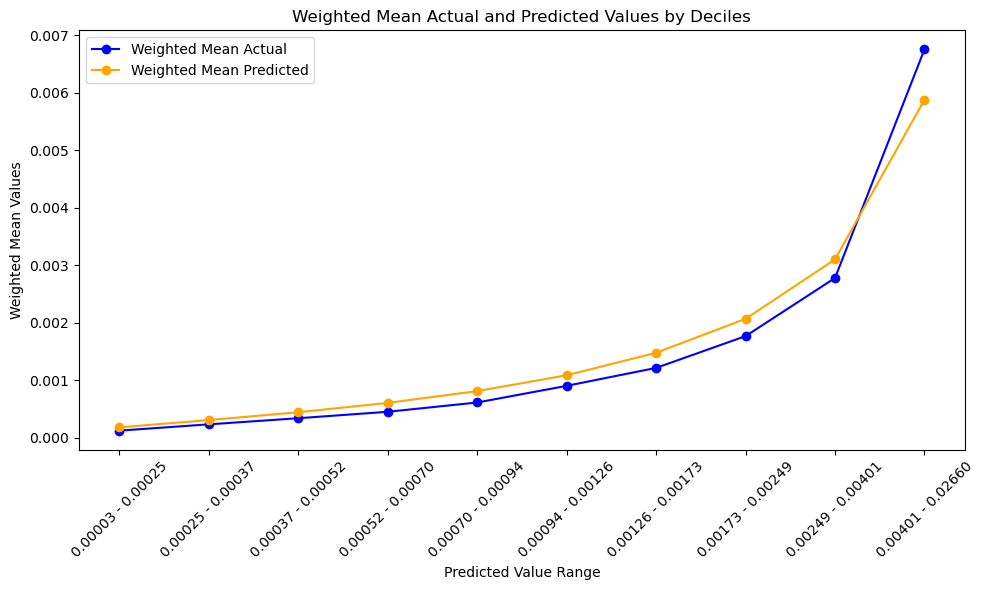

In [67]:
actual = y_test_tensor.numpy().flatten()
predicted = np.round(outputs.numpy().flatten(), 10)
weights2 = test_weights_tensor.numpy().flatten()

df_lift = pd.DataFrame({"actual": actual, "predicted": predicted, "weights": weights2})
df_lift = df_lift.sort_values(by="predicted", ascending=False)
# df_lift["Age"] = test_df["Age"]
# Create deciles
df_lift["decile"] = pd.qcut(df_lift["predicted"], 10, labels=False)


def weighted_mean(group):
    return pd.Series(
        {
            "weighted_actual": np.average(group["actual"], weights=group["weights"]),
            "weighted_predicted": np.average(
                group["predicted"], weights=group["weights"]
            ),
            "range": f"{group['predicted'].min():.5f} - {group['predicted'].max():.5f}",
        }
    )


decile_summary = df_lift.groupby("decile").apply(weighted_mean)

# Plot the weighted mean actual and predicted values for each decile
plt.figure(figsize=(10, 6))
plt.plot(
    decile_summary["weighted_actual"],
    label="Weighted Mean Actual",
    color="blue",
    marker="o",
)
plt.plot(
    decile_summary["weighted_predicted"],
    label="Weighted Mean Predicted",
    color="orange",
    marker="o",
)
plt.xlabel("Predicted Value Range")
plt.ylabel("Weighted Mean Values")
plt.title("Weighted Mean Actual and Predicted Values by Deciles")
plt.xticks(ticks=range(10), labels=decile_summary["range"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()

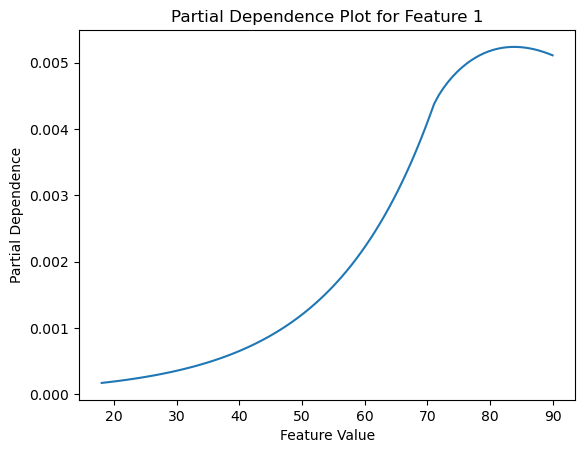

In [72]:
feature_index = X_train.columns.get_loc(
    "Age"
)  # Index of the feature for which to plot partial dependence
feature_index2 = X_train.columns.get_loc("Age2")
grid_values = np.linspace(
    X_train.iloc[:, feature_index].min(), X_train.iloc[:, feature_index].max(), 100
)


# Compute partial dependence
partial_dependence = []
for val in grid_values:
    X_temp = X_train.copy()
    # exposure = combined_df_encoded["LivesExposure"].copy()
    X_temp.iloc[:, feature_index] = val
    X_temp.iloc[:, feature_index2] = np.maximum(val - age_cut, 0) ** age_power
    X_temp_scaled = scaler.transform(X_temp)
    model.eval()
    preds = model(
        torch.tensor(X_temp_scaled, dtype=torch.float32),
        train_offset_tensor,
        # lives_exposure_train_tensor,
    )
    partial_dependence.append(preds.detach().numpy().mean())

# Plot the partial dependence
plt.plot(grid_values, partial_dependence)
plt.xlabel("Feature Value")
plt.ylabel("Partial Dependence")
plt.title("Partial Dependence Plot for Feature {}".format(feature_index))
plt.show()